In [1]:
# dev
import sys
sys.path.append("..")

import pyparanoid.pyparanoid as pp
import pyparanoid.genomeplot as gplot

In [2]:
### Let's say we have a sequence of interest. For this example I'm going to use a
### homolog of the AHL synthase LuxI from plant-associated Pseudomonas.

!head ../src/luxI.faa

>pseudomonas_mediterranea|WP_047702825
MNYSSCIHHFSGVSTRIAFYSQIPPQTLQQIFAIRKAAFIDRKKWDIESYQGTDYEWDEYDDPDAVYIYTYTDERVTGAVRLRPSNKPTLMSGALSFILPTGNIRPHSNCCWEATRFALLEDKTLAGEVTQANIDVRTVALFLSMIKFAQLQNIDTYEIVVDTLMEKILKRSGWTVERHNTAFGSKGETIIYGTLPCTLDAYKGVLRKNAIQTITAYEQFLIANRSSDTSHQPFDIDQTHIGRNIPAKKQMHTELHL


In [3]:
### There should be only one sequence in the FASTA file.

### To figure out which PyParanoid groups are most similar to your specific sequence, 
### use the "match_seqs" function and specify the FASTA file and the path to the 
### PyParanoid output directory.

gplot.match_seqs("../src/luxI.faa","../../data/Pseudo/")

group_22008-consensus 1.449 Good match!
group_10893-consensus 0.252 Probably not a very good match...
group_16731-consensus 0.247 Probably not a very good match...
group_13653-consensus 0.221 Probably not a very good match...
group_05036-consensus 0.205 Probably not a very good match...
group_04669-consensus 0.183 Probably not a very good match...


In [4]:
### This function compares your sequence to the consensus sequences of all PyParanoid groups.
### Any significant hits are normalized to the length of the gene and displayed here.

### So in this example, group_22008 is a very good match and then there are 5 other poor matches.
### From other analyses, I know that these are the 5 other AHL synthase families in Pseudomonas so they
### are paralogs/xenologs of the query sequence.

### One common task once you've identified a PyParanoid group would be to see which other genomes have
### this group (i.e. close homologs of your gene of interest.) To do that, use the "add_group_to_tree"
### function. Note that you need to specify the PyParanoid group, a species tree, and the path to the
### PyParanoid directory for this function.

t = gplot.add_group_to_tree("group_22008","../src/BrassClade.tre","../../data/Pseudo")

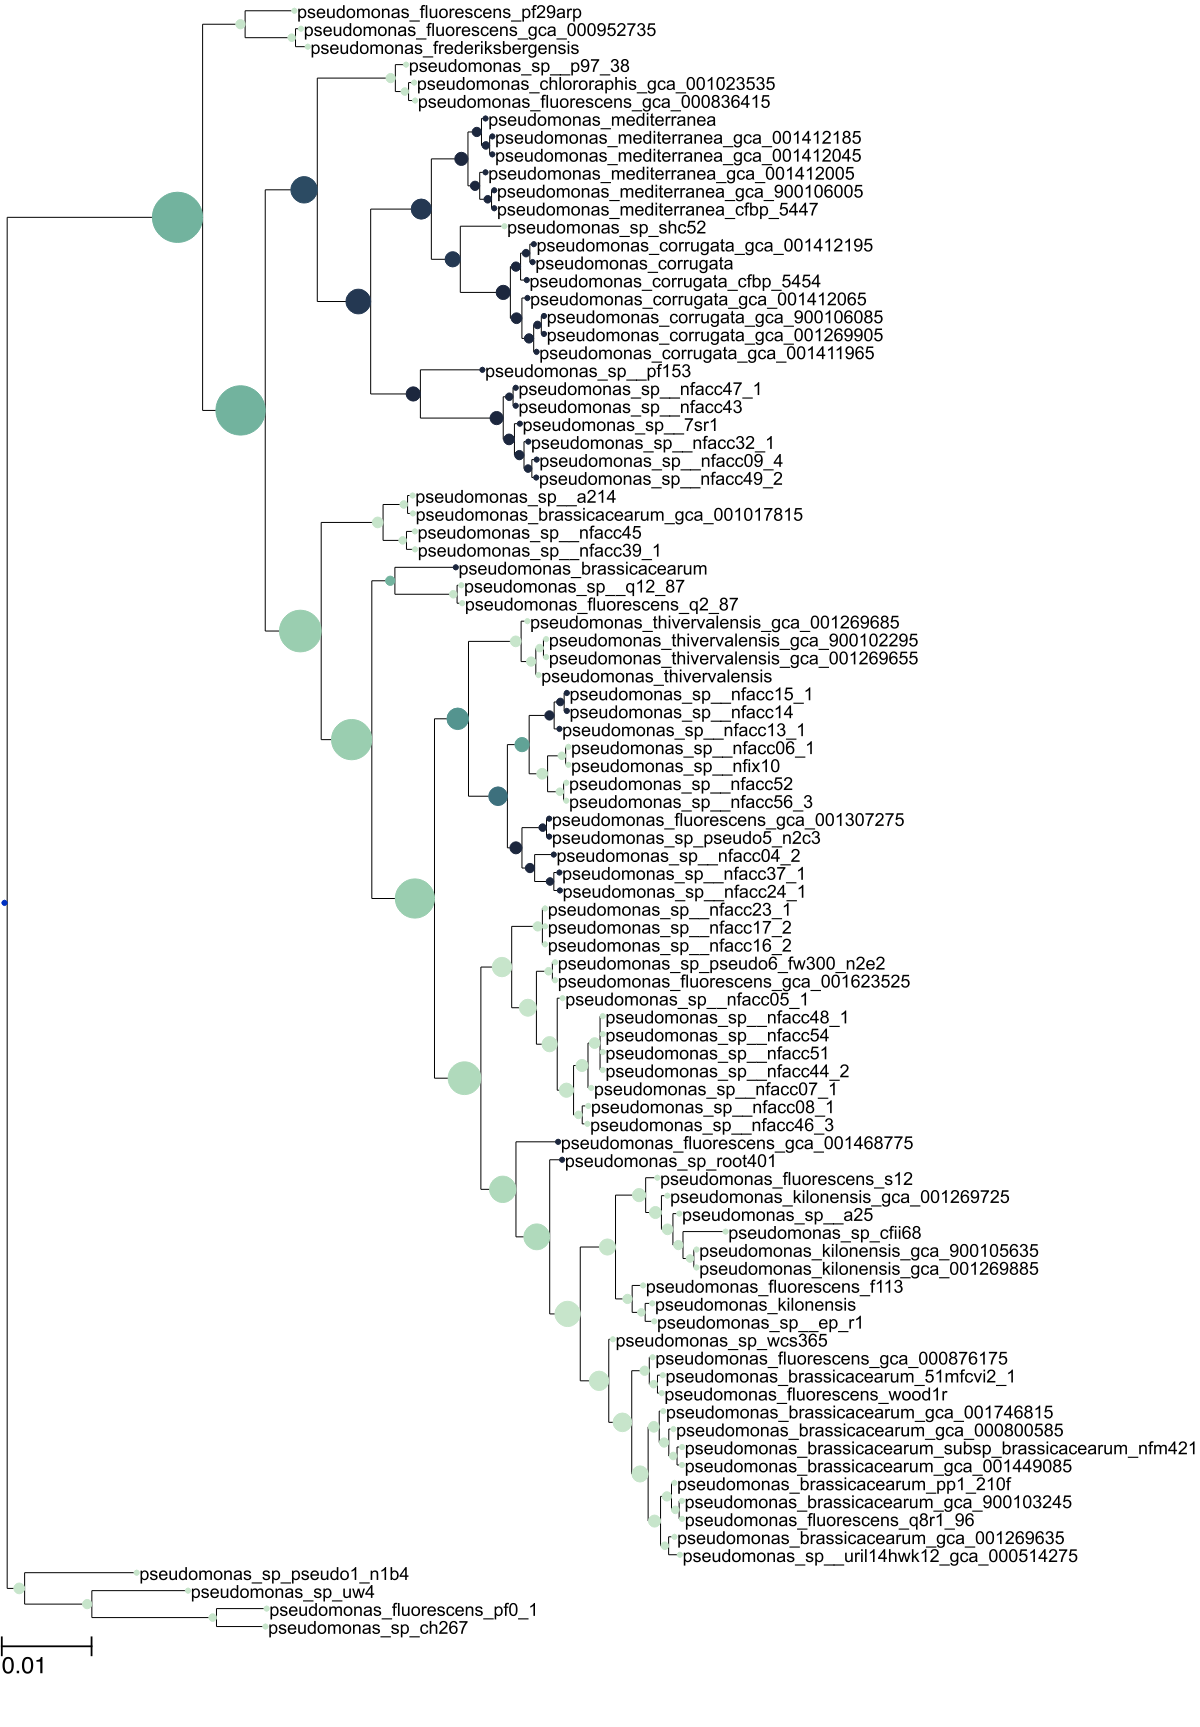

In [7]:
### add_group_to_tree() returns a Tree object from the ETE3 package which you can 
### manipulate further using its methods or just show it using the render() function

t.render('%%inline',w=1200)

### The dark blue leaf nodes show taxa that contain group_22008, while the pale green do not.
### The internal nodes are colored along a gradient to reflect the prevalence of that group
### within that clade. (Dark blue = common, light green = rare)